This file has the code to visualise syllable transition values and create a graph based on it

Date: 20/9/2022

In [11]:
import math
import pandas
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot

from networkx.drawing.nx_pydot import write_dot

In [2]:
#set directory
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\Trans_prob')

In [3]:
file = pandas.read_csv('BF_b36p24_transition_probability.csv', header=None)
df = file.to_numpy()

#Drop the row and column labels, just keep the numeric values
trans_prob = file.iloc[1:, 1:]
trans_prob = np.array(trans_prob)
trans_prob = trans_prob.astype(float)

#Get the set of unique syllables for the individual with their own index (so convert array to list)
uniq_syl = file.iloc[0].to_numpy()
uniq_syl = np.delete(uniq_syl, 0)

print(uniq_syl)
#print(trans_prob)

['Start' 'a' 'b' 'd' 'c' 'e' 'End' 'h']


In [4]:
states = uniq_syl
Q = trans_prob

In [5]:
G = nx.MultiDiGraph()
labels = {}
edge_labels = {}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight = rate,
                       label = rate)
            edge_labels[(origin_state, destination_state)] = label = "{:.02f}".format(rate)

In [6]:
#The dictionary created by 'get_edge_attributes[weight]' has a third element in the tuple that's messing
#up the plotting. This function removes the '0' which is the third element of the tuple.

def fix_zeros(label_dictionary):
    correct_label_dict = {}
    for (n1, n2, zero) in label_dictionary.keys():
        correct_label_dict[(n1, n2)] = label_dictionary[(n1, n2, zero)]
    
    #print(correct_label_dict)
    return correct_label_dict

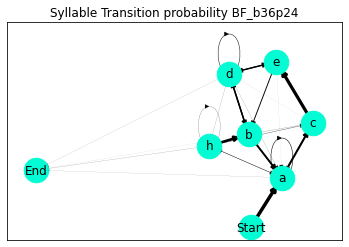

In [21]:
#Website I got this code from - https://qxf2.com/blog/drawing-weighted-graphs-with-networkx/
#planar_layout - no intersection of edges
#spring_layout - positions nodes based on an antigravity algorithm
#pos is a dictionary of positions keyed by a node

#pos = nx.planar_layout(G) 
pos = nx.spring_layout(G, seed = 5) 
#pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = '#03fcd3', node_size = 600)

labels = {}
for node_name in states:
    labels[str(node_name)] = str(node_name)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, font_color="black", font_family="sans-serif")

all_weights = []
for (node1, node2, data) in G.edges(data = True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness

unique_weights = list(set(all_weights))
#print(unique_weights)

for weight in unique_weights:
        #Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1, node2, edge_attr) in G.edges(data = True) if edge_attr['weight'] == weight]
        #I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(states)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G, pos, edgelist = weighted_edges, width = width)

#plot edge weight labels
weight_labels = nx.get_edge_attributes(G,'weight')
new_weight_labels = fix_zeros(weight_labels)
#nx.draw_networkx_edge_labels(G, pos, edge_labels = new_weight_labels, font_size = 8)

plt.title('Syllable Transition probability BF_b36p24')
#plt.figure(figsize=(25, 25))
#plt.savefig('BF_b36p24.png', dpi = 600)
plt.show()
#plt.savefig('BF_b36p24_edge_weight.svg', dpi = 600)


In [8]:
def show_wgraph():
    plt.figure()    
    pos = nx.spring_layout(G, seed = 3)
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G, pos, node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G, pos, edge_labels = new_weight_labels, font_size = 8)

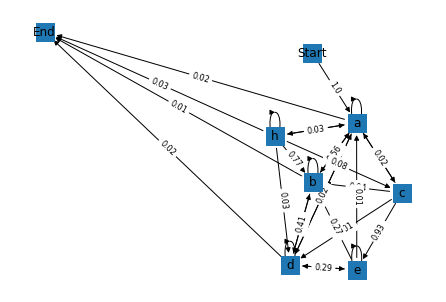

In [18]:
G
show_wgraph()
#plt.savefig('M01_nx_edge_labels1.png', dpi = 600)
plt.savefig('BF_b36p24_edge_labels.svg', dpi = 600)

In [13]:
P = nx.nx_pydot.to_pydot(G)
P

In [77]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.8]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.8]

pos = nx.spring_layout(G, seed=7)

ValueError: too many values to unpack (expected 2)

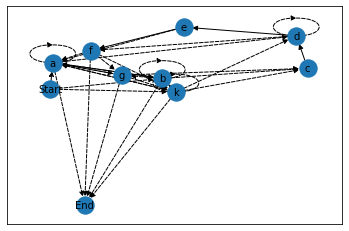

In [78]:

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

plt.show()